<a href="https://colab.research.google.com/github/YoussefMkhaouad/Fece_recognition/blob/master/Face_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etape1




### Au début,il faut importer les bibliothèques nécessaires

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
import os

from PIL import Image
from os import listdir
from os.path import isfile, join
import cv2
import os
from pathlib import Path
from os.path import basename

Using TensorFlow backend.


# Etape2

### Construire la base de données

In [0]:

def getFrame(sec):
    dir=listdir('/content/data11')
    for i in range(len(dir)):

      dd=os.path.join('/content/data11', dir[i])
      vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
      hasFrames,image = vidcap.read()
      
      if hasFrames:

         cv2.imwrite(str(x)+'/'+label+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames

mypath = "/content/drive/My Drive/face_dataset/video_input"

videosFiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) and (f.endswith(("mp4")) or f.endswith(("vip"))) ]

count=1
for vid in videosFiles:
    y=list()
    label,extent=os.path.splitext(vid)
    y.append(label)
    vidcap = cv2.VideoCapture(join(mypath,vid)) 
    vidcap.set(cv2.CAP_PROP_FRAME_WIDTH, 255)
    vidcap.set(cv2.CAP_PROP_FRAME_HEIGHT, 255)
    try:

      if not os.path.exists('/content/data11'+'/'+label): 

		       os.makedirs('/content/data11'+'/'+label) 

    except OSError: 
         
	    print ('Error: Creating directory of data')
    dd=os.path.join('/content/data11',label)
    x=Path(dd)

    sec = 0
    frameRate =0.01 #//it will capture image in each 2 second
    success = getFrame(sec)
    while success:
      count = count + 1
      sec = sec + frameRate
      sec = round(sec, 2)
      success = getFrame(sec)
print('Done!!') 

# Etape3


*   ### Téléchargement des données
##### Après avoir télechargé l'ensemble de données,il faut normaliser les images 




In [0]:
def extract_image(filename, required_size=(160,160 )):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    image = Image.fromarray(pixels)
    image = image.resize(required_size)
    image_array = np.asarray(image)
    return image_array

In [0]:
def load_image(dir):
    images = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        image = extract_image(path)
        images.append(image)
    return images

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        images = load_image(path)
        labels = [subdir for i in range(len(images))]
        print("loaded %d sample for class: %s" % (len(images),subdir) ) # print progress
        X.extend(images)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


In [0]:
import split_folders

split_folders.ratio('/content/drive/My Drive/lfw', output="/content/Split", seed=1337, ratio=(.8, .1, .1))

In [6]:
trainX, trainy = load_dataset('/content/drive/My Drive/Split/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/My Drive/Split/test/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('faces-dataset.npz', trainX, trainy, testX, testy)

loaded 80 sample for class: alix
loaded 80 sample for class: yousra
loaded 80 sample for class: Locas
loaded 80 sample for class: jenniffer
(320, 160, 160, 3) (320,)
loaded 10 sample for class: alix
loaded 10 sample for class: yousra
loaded 10 sample for class: Locas
loaded 10 sample for class: jenniffer
(40, 160, 160, 3) (40,)


In [8]:
data = np.load('/content/faces-dataset.npz') 

x_train = data['arr_0']
x_train = np.array(x_train,dtype='float32')/255

x_test = data['arr_2']
x_test = np.array(x_test,dtype='float32')/255

y_train= data['arr_1']
y_test= data['arr_3']

import numpy as np

y_test=np.where(y_test=='alix', np.array(1), y_test) 
y_test=np.where(y_test=='yousra', np.array(2), y_test) 
y_test=np.where(y_test=='Locas',np.array(3), y_test)
y_test=np.where(y_test=='jenniffer',np.array(4), y_test)
y_test =y_test.astype(np.int)
#y_train = np.array(y_train)
y_train=np.where(y_train=='alix',np.array(1), y_train) 
y_train=np.where(y_train=='yousra',np.array(2), y_train) 
y_train=np.where(y_train=='Locas',np.array(3), y_train)
y_train=np.where(y_train=='jenniffer',np.array(4), y_train)
y_train =y_train.astype(np.int)
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))



x_train : [[[[0.7058824  0.6901961  0.74509805]
   [0.7019608  0.67058825 0.7411765 ]
   [0.6862745  0.6509804  0.7176471 ]
   ...
   [0.7607843  0.7137255  0.74509805]
   [0.7490196  0.7137255  0.74509805]
   [0.7372549  0.7019608  0.73333335]]

  [[0.70980394 0.69411767 0.7490196 ]
   [0.70980394 0.6784314  0.7411765 ]
   [0.6901961  0.6509804  0.7176471 ]
   ...
   [0.7647059  0.7176471  0.7411765 ]
   [0.7529412  0.7137255  0.7372549 ]
   [0.7411765  0.70980394 0.74509805]]

  [[0.70980394 0.69803923 0.7490196 ]
   [0.70980394 0.6784314  0.74509805]
   [0.6901961  0.65882355 0.7254902 ]
   ...
   [0.7607843  0.72156864 0.7490196 ]
   [0.7529412  0.7176471  0.7411765 ]
   [0.7411765  0.70980394 0.74509805]]

  ...

  [[0.69803923 0.7058824  0.8666667 ]
   [0.7019608  0.7137255  0.8745098 ]
   [0.7058824  0.7176471  0.8745098 ]
   ...
   [0.69411767 0.654902   0.7058824 ]
   [0.69411767 0.64705884 0.7058824 ]
   [0.69411767 0.64705884 0.69411767]]

  [[0.69411767 0.7019608  0.8627451

# Etape4
### Split dataset:Train et Test

In [0]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [19]:
im_rows=160
im_cols=160
batch_size=512
im_shape=(im_rows, im_cols, 3)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 288
x_test shape: (40,)


# Etape5
### Construire un modèle CNN
##### CNN a trois couches principales:


1.   Convolotional layer
2.   pooling layer
3.   fully connected layer









In [0]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Convolution2D, MaxPooling2D,MaxPool2D
import os
import numpy as np
import keras_metrics

my_model= Sequential()
my_model.add(Convolution2D(32, (3, 3), input_shape=(160,160, 3), padding='same', activation='relu'))
my_model.add(Convolution2D(32, (3, 3),activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

my_model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
my_model.add(Convolution2D(64, (3, 3),activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#my_model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
#my_model.add(Convolution2D(128, (3, 3),activation='relu'))
#my_model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

my_model.add(Flatten())


my_model.add(Dense(1024,activation='relu'))
Dropout(0.5)
my_model.add(Dense(512,activation='relu'))
Dropout(0.5)
my_model.add(Dense(10,activation='softmax'))

my_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)



### Affiche les paramètres du modèle.

In [27]:
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 158, 158, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 79, 79, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 77, 77, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 92416)            

# Etape6
### Entrainer le modèle

In [28]:
history=my_model.fit(
    np.array(x_train), np.array(y_train), batch_size=20,
    epochs=5, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Train on 288 samples, validate on 16 samples
Epoch 1/5
 - 50s - loss: 1.1406 - accuracy: 0.5625 - val_loss: 0.6763 - val_accuracy: 0.8125
Epoch 2/5
 - 49s - loss: 0.1475 - accuracy: 0.9896 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 3/5
 - 49s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/5
 - 49s - loss: 7.0027e-04 - accuracy: 1.0000 - val_loss: 6.5472e-04 - val_accuracy: 1.0000
Epoch 5/5
 - 49s - loss: 1.5310e-04 - accuracy: 1.0000 - val_loss: 6.2880e-04 - val_accuracy: 1.0000


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


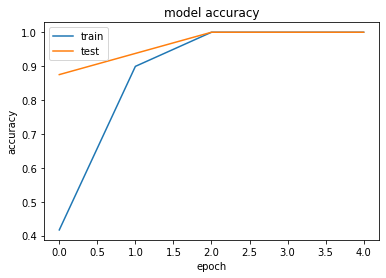

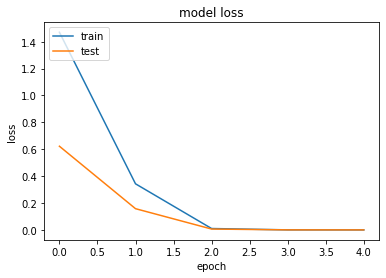

In [23]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()